In [1]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import os.path as op
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, "/Users/geenaildefonso/Projects/")
import mazebox as mb
sys.path.insert(1, '/Users/geenaildefonso/Dropbox (VU Basic Sciences)/')
from typing import Any
from copy import copy
from anndata import AnnData
import scipy.sparse as sp
from cellrank.tl.kernels import VelocityKernel

In [104]:
print('cellrank: {}'.format(cr.__version__))

cellrank: 1.5.0


In [ ]:
dataframe1 = pd.DataFrame(data={"column1": [1, 2, 3, 4, 5]})
dataframe2 = pd.DataFrame(data={"column1": [2, 1]})

common = dataframe1.merge(dataframe2, on=["column1"])
result = dataframe1[dataframe1.column1.isin(common.column1)]
print(result)

In [2]:
adata = scv.read('/Users/geenaildefonso/Dropbox (VU Basic Sciences)/RPM/adata_03b.h5ad')

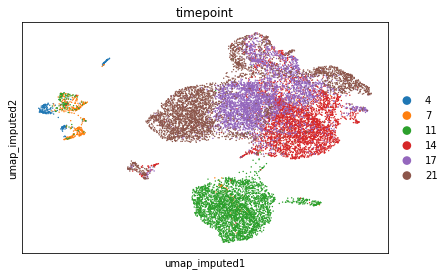

In [4]:
sc.pl.scatter(adata, basis = 'umap_imputed', color = 'timepoint')

In [8]:
print(adata)

AnnData object with n_obs × n_vars = 15138 × 19455
    obs: 'Diffusion Pseudotime', 'Monocle Pseudotime', 'Clusters', '_X', '_Y', 'batch', 'doublet_scores', 'predicted_doublets', 'timepoint', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'barcode', 'ireland_barcode', 'M', 'E', 'clusters_gradients', 'S_score', 'G2M_score', 'phase', 'cell_cycle_diff', 'specialists_pca_diffdist', 'SCLC-Y_Score', 'SCLC-P_Score', 'SCLC-N_Score', 'SCLC-A2_Score', 'SCLC-A_Score', 'Phenotype', 'SCLC-A_Score_pos', 'SCLC-A2_Score_pos', 'SCLC-N_Score_pos', 'SCLC-P_Score_pos', 'SCLC-Y_Score_pos', 'arc_pheno', 'arc_aa_type', 'ParetoTI_specialists', 'subtype', 'subtype_labeled'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'mean', 'std', 'n_cells'
    uns: 'clusters_gradients_colors', 'neighbors', 'pca', 'phase_colors', 'predicted_doublets_colors', 'timepoint_colors', 'umap'
    obsm: 'ParetoTI_S', 'X_pca', 'X_pca_imputed', 'X_umap', 'X_um

In [ ]:
scv.pl.velocity_embedding_stream(adata, basis = 'X_umap', color = ['timepoint','ParetoTI_specialists'], legend_loc = 'on right', dpi=150)

In [ ]:
scv.pl.umap(adata, basis = 'umap_imputed', color = ['timepoint','ParetoTI_specialists'], legend_loc = 'on right', dpi=150)

In [ ]:
adata

In [ ]:
adata

In [ ]:
pseudo = pd.read_csv('PseudoCorr.csv', index_col=0, header = 0)
pseudo.reset_index(inplace=True)
pseudo = pseudo.rename(columns = {'index':'barcode'})
print(pseudo.head())

In [ ]:
pseudo['barcode'] = [i.split('_')[0] for i in pseudo['Barcode']]

adata.obs['barcode'] = [str(i.split(":")[1].split('x')[0]) for i in adata.obs_names]

filtered_cells = []
for i in adata.obs['barcode']:
    if i in list(pseudo['barcode']): 
        filtered_cells.append(True)
    else:
        filtered_cells.append(False)
adata.obs['kept'] = filtered_cells 
# sc.pl.umap(adata, color = 'kept')

In [ ]:
filtered_cells2 = []
for i in pseudo['barcode']:
    if i in list(adata.obs['barcode']): 
        filtered_cells2.append(True)
    else:
        filtered_cells2.append(False)
pseudo['kept'] = filtered_cells2 
# sc.pl.umap(adata, color = 'kept')

In [ ]:
pseudo_filtered = pseudo[pseudo['kept'] == True]
print(len(pseudo_filtered['kept']))

In [ ]:
adata_filtered = adata[adata.obs.kept==True].copy()

In [ ]:
pseudo_filtered.columns

In [ ]:
adata_filtered.obs.barcode

In [ ]:
pseudo_bar = list(pseudo_filtered['barcode'])
adata_bar = list(adata_filtered.obs['barcode'])

In [ ]:
print(len(adata_filtered[adata_filtered.obs['barcode'].duplicated]))

In [ ]:
negative = list(set(adata_bar) - set(pseudo_bar))
# list(set(var_names) & set(tfsl))

In [ ]:
print(negative)

In [ ]:
pseudo['barcode']

In [ ]:
adata_filtered.obs.barcode

In [ ]:
pseudo.head()

In [ ]:
print(pseudo.shape)
print(adata_filtered.shape)

In [ ]:
pd.merge(adata_filtered.obs, pseudo,  how='right')

In [ ]:
print(len(adata.obs.loc[adata.obs['kept'] == True]))
print(len(adata.obs.loc[adata.obs['kept'] == False]))

In [ ]:
var_names = list(adata.var_names)

In [ ]:
adata.obs.drop(adata[adata.obs['kept'] == False], inplace=True)

In [ ]:
print(adata.obs.shape)

In [ ]:
print(len(adata.obs.loc[adata.obs['kept'] == True]))
print(len(adata.obs.loc[adata.obs['kept'] == False]))

In [ ]:
adata.obs['barcode_kept'] = adata.obs[adata.obs['kept']]

In [ ]:
adata.obs['barcode_kept'] = adata.obs.loc[adata.obs['kept'] == True]
# print(len(adata.obs.loc[adata.obs['kept'] == True]))
# print(len(adata.obs.loc[adata.obs['kept'] == False]))

In [ ]:
adata.obs['barcode_kept'] = adata.obs.loc[pseudo['barcode_kept'] == 'True']

In [ ]:
tfs = ['SP100', 'FOSL1', 'HES1', 'NFKBIZ', 'RELB', 'EPAS1', 'BCL3', 'REST', 'SP110', 'NFKB2', 'TEAD2', 'HMG20B', 'SIX5',
       'RARG', 'TEAD4', 'ZNF217', 'SP140L', 'SOX18', 'HOXC13', 'STAT6', 'ETV4', 'KLF2', 'MITF', 'NR0B2', 'ASCL1', 'ZBTB7C', 'ELF3',
       'RORC', 'FOXA2', 'ETS2','TOX3', 'XBP1', 'ST18', 'FOXA1', 'OVOL2', 'ZNF664', 'TBX10', 'PROX1', 'ETV6', 'CEBPD', 'TFCP2L1', 'FOXJ3',
       'ZNF407', 'ZNF511','ZNF396', 'RBPJ', 'ZSCAN31', 'HOXB5', 'ZNF3', 'TSHZ2', 'ZBTB16', 'ZNF10', 'FLI1', 'GATA4', 'NR0B1', 'NHLH1',
       'NEUROD6', 'ZNF581', 'TCF15', 'LYAR', 'ISL2', 'OLIG2', 'NEUROD1', 'INSM1', 'PAX5', 'SP6', 'MYT1', 'HES6', 'ZNF24', 'ISL1', 'ZNF397',
       'SOX11', 'ZNF253', 'SMAD4', 'RBP1', 'ONECUT2', 'ZNF711', 'DLX5', 'GRIP1', 'ZNF157', 'ZNF713', 'ZNF136', 'FOXN4', 'PATZ1', 'ZNF491',
       'ZBTB21', 'KLF12', 'ZNF501', 'ZNF785', 'CXXC1', 'ZNF324', 'ZNF764', 'ZBTB18', 'KAT8', 'ZNF334', 'POU4F1', 'ZNF250', 'ZNF132',
       'SALL2', 'DLX6', 'MBD1','SOX1', 'ZFP3', 'ZNF543', 'POU2F1', 'NONO', 'SMAD9', 'ZKSCAN2', 'TCF12', 'VEZF1', 'TOX', 'BHLHE22', 'MTA1',
       'TCF3', 'SCRT2', 'RFX7','NHLH2', 'SCRT1', 'RCOR2', 'PURG', 'TBPL1', 'TCF4', 'EBF1', 'ZNF749', 'NEUROD2', 'ZNF423', 'BACH2', 'GLI1',
       'ZFP64','NKX2-1', 'MYC', 'YAP1', 'POU2F3', 'MYCL', 'MYCN', 'ASCL2', 'AVIL', 'CHAT', 'GFI1B',
      'CHGA','EPCAM', 'Tmed11', 'Rsl24d1','Olfr123', 'Adam20','Srsf2', 'G3bp1', 'Snrpd1', 'Pgk1', 'Rps3', 'Psmd1', 'Orc2', 'Psma2', 'Syncrip', 'Cnbp',
            'Gspt1', 'Ppm1g', 'Eif4e', 'Hnrnpa3', 'Abce1', 'Hnrnpu',  'Ifrd1', 'Kpna2', 'Dhx15', 'Mcm4']
# for i in range(len(tfsl)):
#     tfs[i] = tfs[i].capitalize()
# print(tfs)

In [5]:
tfsl = ['Sp100', 'Fosl1', 'Hes1', 'Nfkbiz', 'Relb', 'Epas1', 'Bcl3', 'Rest', 'Sp110', 'Nfkb2', 'Tead2', 'Hmg20b', 'Six5',
        'Rarg', 'Tead4', 'Znf217', 'Sp140l', 'Sox18', 'Hoxc13', 'Stat6', 'Etv4', 'Klf2', 'Mitf', 'Nr0b2', 'Ascl1', 'Zbtb7c',
        'Elf3', 'Rorc', 'Foxa2', 'Ets2', 'Tox3', 'Xbp1', 'St18', 'Foxa1', 'Ovol2', 'Znf664', 'Tbx10', 'Prox1', 'Etv6', 'Cebpd',
        'Tfcp2l1', 'Foxj3', 'Znf407', 'Znf511', 'Znf396', 'Rbpj', 'Zscan31', 'Hoxb5', 'Znf3', 'Tshz2', 'Zbtb16', 'Znf10', 'Fli1',
        'Gata4', 'Nr0b1', 'Nhlh1', 'Neurod6', 'Znf581', 'Tcf15', 'Lyar', 'Isl2', 'Olig2', 'Neurod1', 'Insm1', 'Pax5', 'Sp6', 'Myt1',
        'Hes6', 'Znf24', 'Isl1', 'Znf397', 'Sox11', 'Znf253', 'Smad4', 'Rbp1', 'Onecut2', 'Znf711', 'Dlx5', 'Grip1', 'Znf157',
        'Znf713', 'Znf136', 'Foxn4', 'Patz1', 'Znf491', 'Zbtb21', 'Klf12', 'Znf501', 'Znf785', 'Cxxc1', 'Znf324', 'Znf764',
        'Zbtb18', 'Kat8', 'Znf334', 'Pou4f1', 'Znf250', 'Znf132', 'Sall2', 'Dlx6', 'Mbd1', 'Sox1', 'Zfp3', 'Znf543', 'Pou2f1',
        'Nono', 'Smad9', 'Zkscan2', 'Tcf12', 'Vezf1', 'Tox', 'Bhlhe22', 'Mta1', 'Tcf3', 'Scrt2', 'Rfx7', 'Nhlh2', 'Scrt1', 'Rcor2',
        'Purg', 'Tbpl1', 'Tcf4', 'Ebf1', 'Znf749', 'Neurod2', 'Znf423', 'Bach2', 'Gli1', 'Zfp64', 'Nkx2-1', 'Myc', 'Yap1', 'Pou2f3', 
        'Mycl', 'Mycn', 'Ascl2', 'Avil', 'Chat', 'Gfi1b', 'Chga', 'Epcam', 'Tmed11', 'Rsl24d1', 'Olfr123', 'Adam20', 'Srsf2', 'G3bp1',
        'Snrpd1', 'Pgk1', 'Rps3', 'Psmd1', 'Orc2', 'Psma2', 'Syncrip', 'Cnbp', 'Gspt1', 'Ppm1g', 'Eif4e', 'Hnrnpa3', 'Abce1', 'Hnrnpu',
        'Ifrd1', 'Kpna2', 'Dhx15', 'Mcm4','Dll1', 'Dll3', 'Dll4', 'Jag1', 'Jag2', 'Notch1', 'Notch2', 'Notch3', 'Notch4', 'Rbpj', 'Hes1', 'Myc', 'Rest', 'Hes6', 'Mycl', 'Ascl1', 'Pou2f3', 'Neurod1']
print(len(tfsl))

183


In [101]:
notch_genes = ['Dll1', 'Dll3', 'Dll4', 'Jag1', 'Jag2', 'Notch1', 'Notch2', 'Notch3', 'Notch4', 'Rbpj', 'Hes1', 'Myc', 'Rest', 'Hes6', 'Mycl', 'Ascl1', 'Pou2f3', 'Neurod1', 'Yap1']

In [103]:
print(len(notch_genes))

19


In [ ]:
both = list(set(notch_genes) -set(var_names))
print(len(both))
print(both)

In [ ]:
both = list(set(var_names) & set(tfsl))
print(len(both))
print(both)

In [ ]:
negative = list(set(tfsl) - set(both))
print(negative)

In [12]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, retain_genes = tfsl)

Filtered out 8558 genes that are detected 20 counts (shared).


In [13]:
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/16 cores)


  0%|          | 0/10897 [00:00<?, ?gene/s]

/Users/geenaildefonso/anaconda/envs/mazebox_env/lib/python3.9/site-packages/scvelo/tools/dynamical_model.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/Users/geenaildefonso/anaconda/envs/mazebox_env/lib/python3.9/site-packages/scvelo/tools/dynamical_model.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (1:28:46) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [14]:
scv.tl.velocity(adata, mode="dynamical")
scv.tl.velocity_graph(adata)

computing moments based on connectivities
    finished (0:00:13) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:03:08) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/16 cores)


  0%|          | 0/15138 [00:00<?, ?cells/s]

/Users/geenaildefonso/anaconda/envs/mazebox_env/lib/python3.9/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:01:59) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


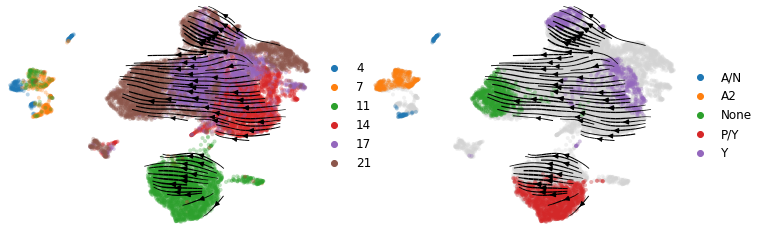

In [75]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap_imputed", color = ['timepoint', 'ParetoTI_specialists'], legend_fontsize=12, title="", smooth=0.8, min_mass=4, legend_loc = 'on right')

In [17]:
adata.write_h5ad('/Users/geenaildefonso/Dropbox (VU Basic Sciences)/RPM/adata_03bwvl.h5ad')

In [28]:
print(adata.obs.columns)

Index(['Diffusion Pseudotime', 'Monocle Pseudotime', 'Clusters', '_X', '_Y',
       'batch', 'doublet_scores', 'predicted_doublets', 'timepoint', 'n_genes',
       'initial_size_spliced', 'initial_size_unspliced', 'initial_size',
       'n_counts', 'barcode', 'ireland_barcode', 'M', 'E',
       'clusters_gradients', 'S_score', 'G2M_score', 'phase',
       'cell_cycle_diff', 'specialists_pca_diffdist', 'SCLC-Y_Score',
       'SCLC-P_Score', 'SCLC-N_Score', 'SCLC-A2_Score', 'SCLC-A_Score',
       'Phenotype', 'SCLC-A_Score_pos', 'SCLC-A2_Score_pos',
       'SCLC-N_Score_pos', 'SCLC-P_Score_pos', 'SCLC-Y_Score_pos', 'arc_pheno',
       'arc_aa_type', 'ParetoTI_specialists', 'subtype', 'subtype_labeled',
       'velocity_self_transition'],
      dtype='object')


In [18]:
class MyKernel(cr.tl.kernels.Kernel):
    def __init__(
        self, adata: AnnData, obs_key: str = "Diffusion Pseudotime", **kwargs: Any
    ):
        super().__init__(adata=adata, obs_key=obs_key, **kwargs)

    def _read_from_adata(self, obs_key: str, **kwargs: Any) -> None:
        super()._read_from_adata(**kwargs)

        print(f"Reading `adata.obs[{obs_key!r}]`")
        self.pseudotime = self.adata.obs[obs_key].values

    def compute_transition_matrix(self, some_parameter: float = 0.5) -> "MyKernel":
        print("Accessing `.pseudotime`: ", self.pseudotime)
        transition_matrix = sp.diags(
            (some_parameter,) * len(self.adata), dtype=np.float64
        )

        self._compute_transition_matrix(transition_matrix)

        return self

    def copy(self) -> "MyKernel":
        return copy(self)

In [ ]:
print(list(adata.obs.dpt_pseudotime)) # 'velocity_pseudotime', 'dpt_pseudotime'

In [19]:
k = MyKernel(adata).compute_transition_matrix()
k

Reading `adata.obs['Diffusion Pseudotime']`
Accessing `.pseudotime`:  [0.08062416 0.07080161 0.0694875  ... 0.13437028 0.12651777 0.10692273]


<MyKernel>

In [20]:
vk = VelocityKernel(adata)

In [21]:
vk.compute_transition_matrix()

  0%|          | 0/15138 [00:00<?, ?cell/s]

  0%|          | 0/15138 [00:00<?, ?cell/s]

<VelocityKernel>

In [22]:
k.compute_transition_matrix()

Accessing `.pseudotime`:  [0.08062416 0.07080161 0.0694875  ... 0.13437028 0.12651777 0.10692273]


<MyKernel>

In [42]:
combined_kernel = 0.2 * vk + 0.8* k

In [43]:
from cellrank.tl.estimators import GPCCA

g = GPCCA(combined_kernel)
print(g)

GPCCA[n=15138, kernel=((0.2 * <VelocityKernel[softmax_scale=6.5, mode=deterministic, seed=2732, scheme=<CorrelationScheme>]>) + (0.8 * <MyKernel>))]


In [44]:
g.compute_schur(n_components=20)
# g.plot_spectrum()

Mat Object: 1 MPI processes
  type: seqdense
1.0000000000000018e+00 6.6514113123594849e-05 -5.4412478628495533e-04 1.6704362829687853e-03 7.3891530513962660e-04 -1.8039704142251353e-03 -1.2576721576723618e-04 -1.1940083171112026e-02 -6.0982548993203569e-03 -1.0209968952559916e-02 -5.4962848258449971e-03 -3.0521032213264524e-03 -7.6879456369851737e-03 -4.6016330631051920e-03 -1.4978992468520113e-03 2.4601015280944576e-03 -8.0822443089676073e-03 4.7091586213055640e-03 1.5143561462149430e-02 -6.6433505071910133e-03 
0.0000000000000000e+00 9.9958310534256145e-01 1.7391165659415944e-05 1.1364343837945649e-03 2.2662465224771973e-03 1.4481312416895317e-06 -6.4161649701412898e-04 5.9134343053024695e-03 -7.0039051088670713e-04 4.4301701267264373e-03 3.7517638459987207e-03 1.1967171739423589e-03 1.6975951012630369e-03 1.5942620021130458e-03 2.2366220123737485e-03 -9.5875452601530990e-04 6.9262415220091135e-03 5.0540807157761804e-03 -1.5530545279289565e-03 3.2088547854817518e-03 
0.00000000000000

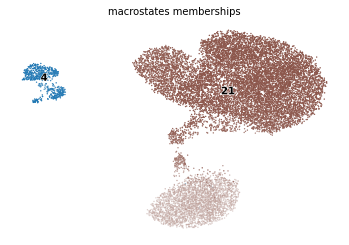

In [45]:
g.compute_macrostates(cluster_key="timepoint")
g.plot_macrostates()

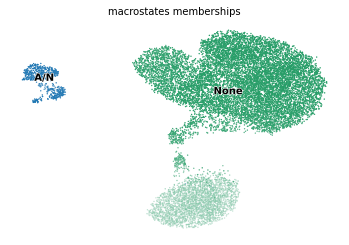

In [29]:
g.compute_macrostates(cluster_key="ParetoTI_specialists")
g.plot_macrostates()

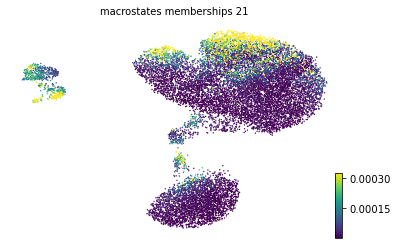

In [50]:
g.compute_macrostates(n_states = 1,cluster_key="timepoint")
g.plot_macrostates()

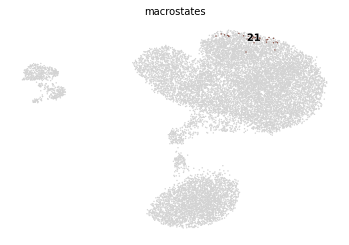

In [51]:
g.plot_macrostates(same_plot=False, discrete=True) #save = 'figures/macrostates_diffplots_05v_06pt.pdf') #n,discrete=True)

In [52]:
g.compute_terminal_states()

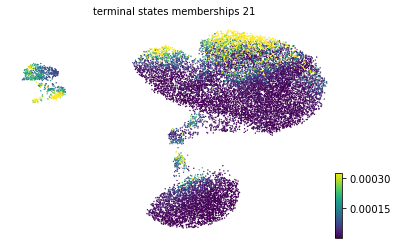

In [53]:
g.plot_terminal_states() #save = 'figures/terminalstates_diffplots_05v_06pt.pdf')

In [ ]:
g.plot_macrostates(discrete=False)

In [ ]:
# g.set_terminal_states_from_macrostates(["day_4", 'day_7', 'day_11', 'day_14', 'day_17', 'day_21'])

In [ ]:
# g.set_terminal_states(["day_4", 'day_7', 'day_11', 'day_14', 'day_17', 'day_21'])

In [54]:
g.compute_absorption_probabilities(solver="gmres", use_petsc=True)

  0%|          | 0/1 [00:00<?, ?/s]

In [55]:
day7_drivers = g.compute_lineage_drivers(lineages="7", return_drivers=True)
day7_drivers.sort_values(by="7_corr", ascending=False)
g.plot_lineage_drivers("7", n_genes=15)

KeyError: "Invalid lineage name `7`. Valid names are: `['21']`."

In [ ]:
day11_drivers = g.compute_lineage_drivers(lineages="11", return_drivers=True)
day11_drivers.sort_values(by="11_corr", ascending=False)
g.plot_lineage_drivers("11", n_genes=15)

In [ ]:
day17_drivers = g.compute_lineage_drivers(lineages="17", return_drivers=True)
day17_drivers.sort_values(by="17_corr", ascending=False)
g.plot_lineage_drivers("17", n_genes=15)

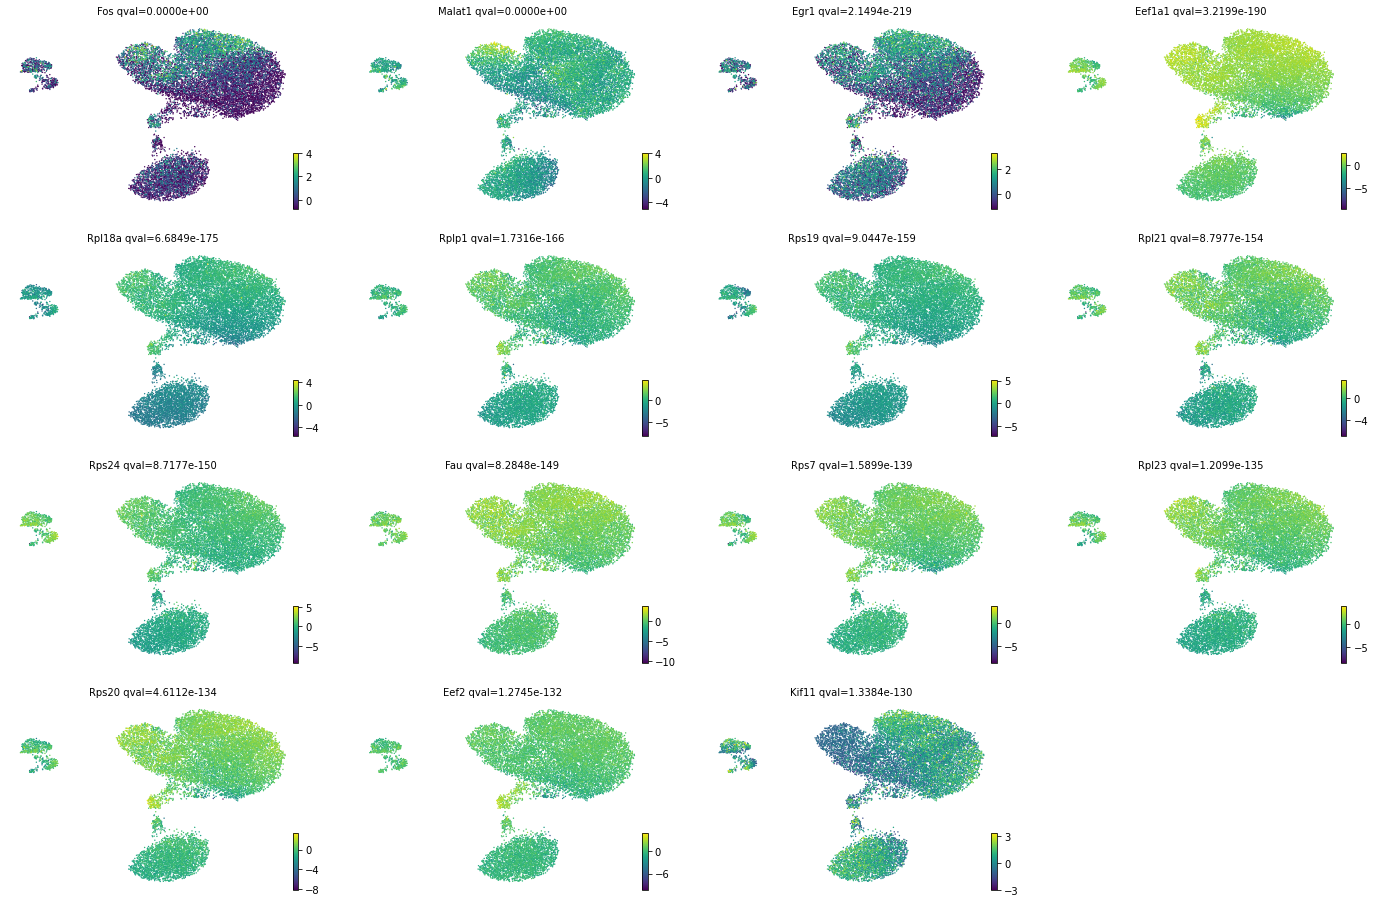

In [56]:
day21_drivers = g.compute_lineage_drivers(lineages="21", return_drivers=True)
day21_drivers.sort_values(by="21_corr", ascending=False)
g.plot_lineage_drivers("21", n_genes=15)

In [76]:
scv.tl.recover_latent_time(
    adata, root_key="initial_states_probs", end_key="terminal_states_probs"
)

computing latent time using initial_states_probs, terminal_states_probs as prior
    finished (0:00:28) --> added 
    'latent_time', shared time (adata.obs)


In [57]:
scv.tl.paga(
    adata,
    groups="timepoint",
    root_key="initial_states_probs",
    end_key="terminal_states_probs",
    use_time_prior="Diffusion Pseudotime",
)

running PAGA using priors: ['Diffusion Pseudotime', 'terminal_states_probs']
    finished (0:00:03) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


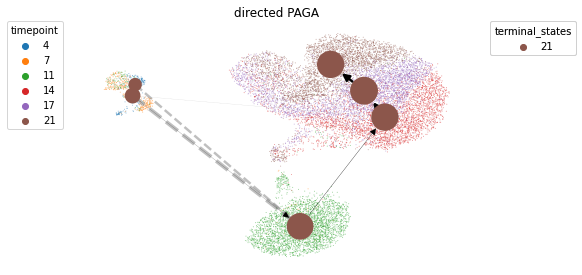

In [58]:
cr.pl.cluster_fates(
    adata,
    mode="paga_pie",
    cluster_key="timepoint",
    basis="umap",
    legend_kwargs={"loc": "top right out"},
    legend_loc="top left out",
    node_size_scale=5,
    edge_width_scale=1,
    max_edge_width=4,
    title="directed PAGA",
)

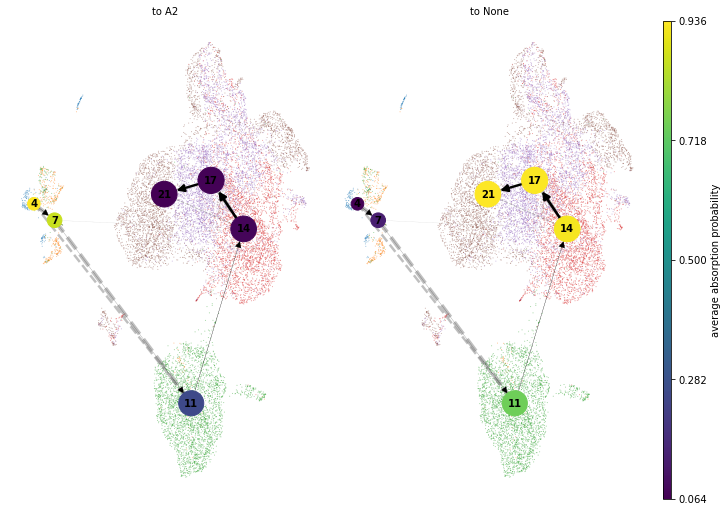

In [79]:
cr.pl.cluster_fates(
    adata,
    mode="paga",
    cluster_key="timepoint",
    basis="umap_imputed",
    legend_kwargs={"loc": "top right out"},
    legend_loc="on data",
    node_size_scale=4,
    edge_width_scale=1,
    max_edge_width=4,
    title="Directed PAGA",figsize = (10, 7))#, save = 'paga_timepoint.pdf')

TypeError: object of type 'numpy.float64' has no len()

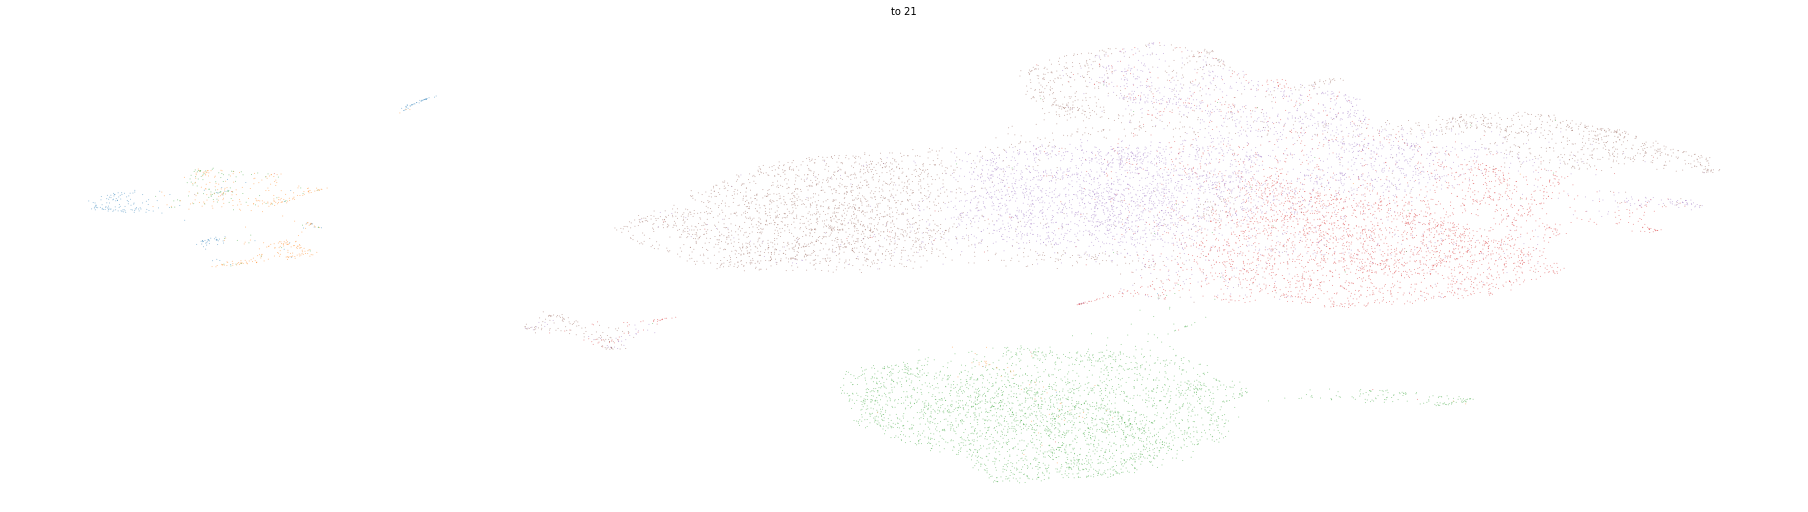

In [62]:
cr.pl.cluster_fates(
    adata,
    mode="paga",
    cluster_key="ParetoTI_specialists",
    basis="umap_imputed",
    legend_kwargs={"loc": "top right out"},
    legend_loc="on data",
    node_size_scale=4,
    edge_width_scale=1,
    max_edge_width=4,
    title="Directed PAGA",figsize = (25, 7))#, save = 'paga_timepoint.pdf')

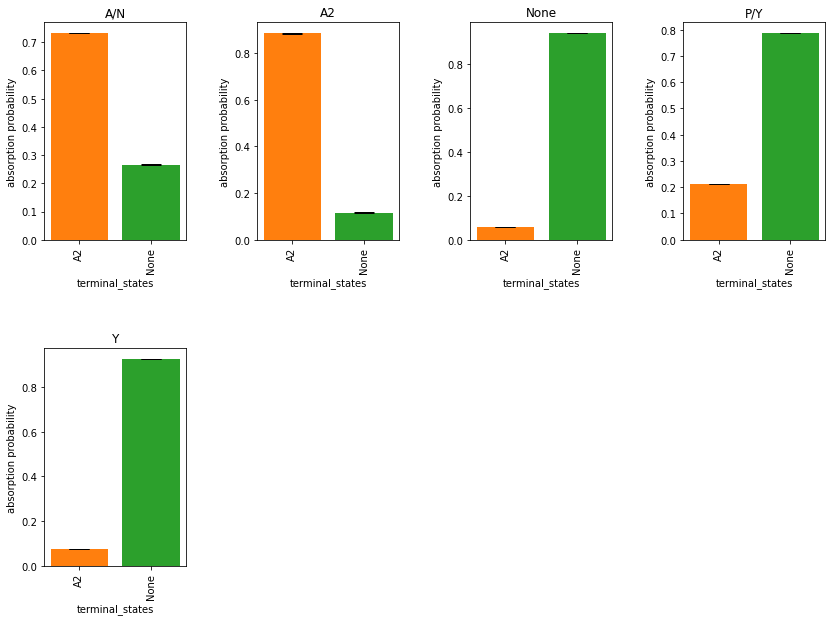

In [80]:
cr.pl.cluster_fates(
    adata,
    mode="bar",
    cluster_key="ParetoTI_specialists",
    basis="umap_imputed") #, save = 'paga_bar_timepoint.pdf'


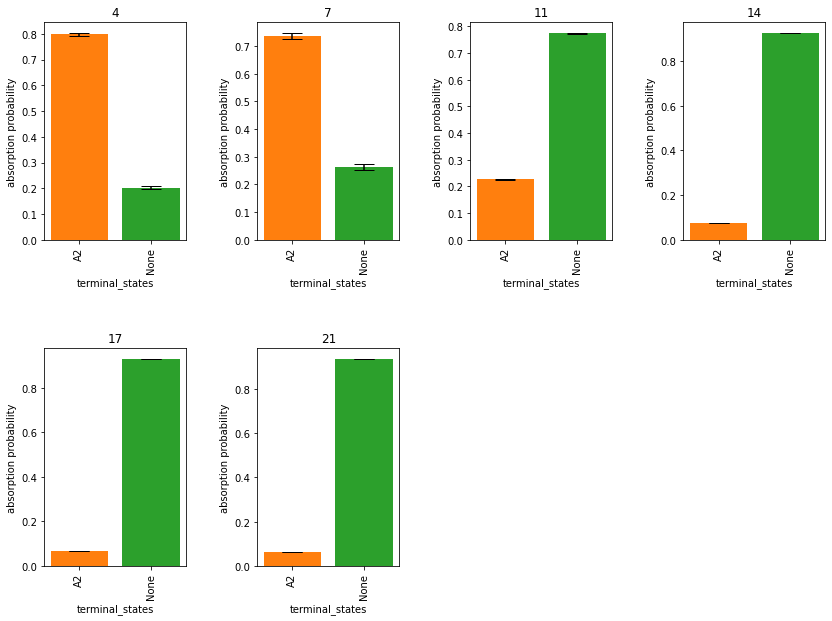

In [81]:
cr.pl.cluster_fates(
    adata,
    mode="bar",
    cluster_key="timepoint",
    basis="umap_imputed") #, save = 'paga_bar_timepoint.pdf'


In [ ]:
cr.pl.cluster_fates(adata, mode="violin", cluster_key="timepoint")

In [ ]:
cr.pl.cluster_fates(
    adata,
    mode="paga_pie",
    cluster_key="timepoint",
    basis="umap",
    legend_kwargs={"loc": "bottom right"},
    legend_loc="on data",
    node_size_scale=4,
    edge_width_scale=5,
    max_edge_width=7,
    title="directed PAGA") # figsize = (10,10), save = 'figures/paga_pie_timepoint_ondata_bigfig.pdf')


In [ ]:
cr.pl.cluster_fates(
    adata,
    mode="paga",
    cluster_key="timepoint",
    basis="umap",
    legend_kwargs={"loc": "bottom right"},
    legend_loc="on data",
    node_size_scale=4,
    edge_width_scale=1,
    max_edge_width=4,
    title="directed PAGA")
   # figsize = (10,5)) 
    #save = 'figures/paga_pie_timepoint_ondata.pdf'


/var/folders/mk/5gzhv5l57n56d6x7fnfgzpw00000gn/T/ipykernel_83441/22575670.py:1: DeprecationWarning: `cellrank.tl.initial_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.initial_states(adata, cluster_key="timepoint")
/Users/geenaildefonso/anaconda/envs/mazebox_env/lib/python3.9/site-packages/cellrank/tl/_init_term_states.py:156: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  kernel = transition_matrix(


  0%|          | 0/15138 [00:00<?, ?cell/s]

  0%|          | 0/15138 [00:00<?, ?cell/s]

Mat Object: 1 MPI processes
  type: seqdense
1.0000000000000024e+00 -4.7512483449814794e-04 -4.4187772716587116e-03 6.5636425441970665e-04 
0.0000000000000000e+00 9.9468292137076375e-01 3.3149084307503067e-04 3.8639393990182424e-04 
0.0000000000000000e+00 0.0000000000000000e+00 9.9339929020639317e-01 8.5300682342112134e-04 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 9.8309234974048665e-01 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 


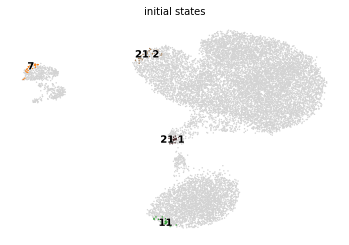

In [66]:
cr.tl.initial_states(adata, cluster_key="timepoint")
cr.pl.initial_states(adata, discrete=True)

/var/folders/mk/5gzhv5l57n56d6x7fnfgzpw00000gn/T/ipykernel_83441/296775543.py:1: DeprecationWarning: `cellrank.tl.initial_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.initial_states(adata, cluster_key="ParetoTI_specialists")


Mat Object: 1 MPI processes
  type: seqdense
1.0000000000000024e+00 -4.7512483449814794e-04 -4.4187772716587116e-03 6.5636425441970665e-04 
0.0000000000000000e+00 9.9468292137076375e-01 3.3149084307503067e-04 3.8639393990182424e-04 
0.0000000000000000e+00 0.0000000000000000e+00 9.9339929020639317e-01 8.5300682342112134e-04 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 9.8309234974048665e-01 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 


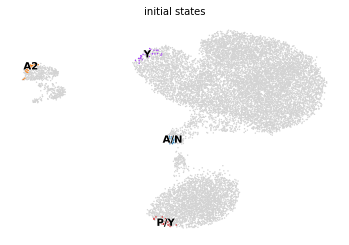

In [67]:
cr.tl.initial_states(adata, cluster_key="ParetoTI_specialists")
cr.pl.initial_states(adata, discrete=True)

In [ ]:
adata.obs["initial_states"]

In [ ]:
list(adata.obs.columns)

ValueError: color key is invalid! pass valid observation annotation or a gene name

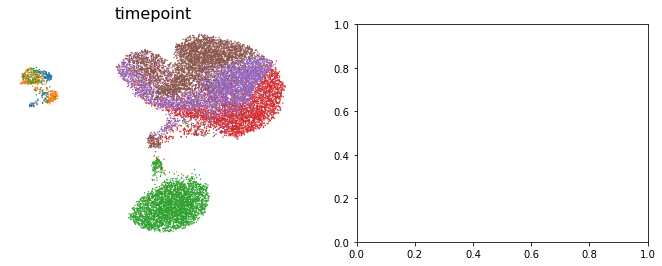

In [82]:
# compue DPT, starting from CellRank defined root cell
root_idx = np.where(adata.obs["initial_states"] == "A2")[0][0]
adata.uns["iroot"] = root_idx
sc.tl.dpt(adata)

scv.pl.scatter(
    adata,
    color=["timepoint", "root_idx", "latent_time", "Diffusion Pseudotime"],
    fontsize=16,
    cmap="viridis",
    perc=[2, 98],
    colorbar=True,
    rescale_color=[0, 1],
    title=["timepoint", "root_cell", "latent_time", "Diffusion Pseudotime"],
)

In [ ]:
# compue DPT, starting from CellRank defined root cell
root_idx = np.where(adata.obs["initial_states"] == "4")[0][0]
adata.uns["iroot"] = root_idx
sc.tl.dpt(adata)

scv.pl.scatter(
    adata,
    color=["timepoint", root_idx, "latent_time", "Diffusion Pseudotime"],
    fontsize=16,
    cmap="viridis",
    perc=[2, 98],
    colorbar=True,
    rescale_color=[0, 1],
    title=["timepoint", "root_cell", "latent_time", "Diffusion Pseudotime"],
)

In [ ]:
cr.pl.circular_projection(adata, keys="timepoint", legend_loc="right")

In [ ]:
list(adata.obsp)

In [ ]:
cr.pl.graph(
    adata,
    "T_bwd",
    edge_alpha=0.1,
    node_size=5,
    arrows=False,
    keys="timepoint",
    keylocs="obs",
)

In [ ]:
ixs = np.where(adata.obs["timepoint"] == "4")[0]
cr.pl.graph(adata, "T_bwd", ixs=ixs, arrows=True, node_size=25, filter_edges=(0.1, 1))

In [ ]:
ixs = np.where(adata.obs["timepoint"] == "7")[0]
cr.pl.graph(adata, "T_bwd", ixs=ixs, arrows=True, node_size=25, filter_edges=(0.1, 1))

In [ ]:
ixs = np.where(adata.obs["timepoint"] == "11")[0]
cr.pl.graph(adata, "T_bwd", ixs=ixs, arrows=True, node_size=25, filter_edges=(0.1, 1))

In [ ]:
ixs = np.where(adata.obs["timepoint"] == "14")[0]
cr.pl.graph(adata, "T_bwd", ixs=ixs, arrows=True, node_size=25, filter_edges=(0.1, 1))

In [ ]:
ixs = np.where(adata.obs["timepoint"] == "17")[0]
cr.pl.graph(adata, "T_bwd", ixs=ixs, arrows=True, node_size=25, filter_edges=(0.1, 1))

In [ ]:
ixs = np.where(adata.obs["timepoint"] == "21")[0]
cr.pl.graph(adata, "T_bwd", ixs=ixs, arrows=True, node_size=25, filter_edges=(0.1, 1))

In [71]:
cr.tl.terminal_states(
    adata,
    cluster_key="ParetoTI_specialists",
    weight_connectivities=0.2,
    softmax_scale=4,
    show_progress_bar=False,
)
cr.tl.lineages(adata)

model = cr.ul.models.GAM(adata)

/var/folders/mk/5gzhv5l57n56d6x7fnfgzpw00000gn/T/ipykernel_83441/2094431585.py:1: DeprecationWarning: `cellrank.tl.terminal_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.terminal_states(


Mat Object: 1 MPI processes
  type: seqdense
9.9999999999999833e-01 -1.9308237100564556e-06 -4.3863340785921141e-03 
0.0000000000000000e+00 9.9706782279267003e-01 -2.3387999683179370e-03 
0.0000000000000000e+00 0.0000000000000000e+00 9.8775557094772792e-01 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 


/var/folders/mk/5gzhv5l57n56d6x7fnfgzpw00000gn/T/ipykernel_83441/2094431585.py:8: DeprecationWarning: `cellrank.tl.lineages` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.lineages(adata)


  0%|          | 0/2 [00:00<?, ?/s]

In [86]:
cr.tl.terminal_states(
    adata,
    cluster_key="timepoint",
    weight_connectivities=0.2,
    n_states=3,
    softmax_scale=4,
    show_progress_bar=False,
)
cr.tl.lineages(adata)

model = cr.ul.models.GAM(adata,link='log')

/var/folders/mk/5gzhv5l57n56d6x7fnfgzpw00000gn/T/ipykernel_83441/3862868937.py:1: DeprecationWarning: `cellrank.tl.terminal_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.terminal_states(


Mat Object: 1 MPI processes
  type: seqdense
1.0000000000000109e+00 -1.9308237079132395e-06 -4.3863340785895823e-03 6.3706638286082154e-04 
0.0000000000000000e+00 9.9706782279266981e-01 -2.3387999683174617e-03 7.6935846144338374e-05 
0.0000000000000000e+00 0.0000000000000000e+00 9.8775557094772948e-01 6.9801217739435227e-04 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 9.7972310718255529e-01 
0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00 


/var/folders/mk/5gzhv5l57n56d6x7fnfgzpw00000gn/T/ipykernel_83441/3862868937.py:9: DeprecationWarning: `cellrank.tl.lineages` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.lineages(adata)


  0%|          | 0/3 [00:00<?, ?/s]

In [97]:

adatanew = adata.var_names.drop(['CAAA01118383.1']).copy()

In [99]:
adatanew

Index(['Vamp7', 'AC149090.1', 'Xkr4', 'Mrpl15', 'Mybl1', 'Vcpip1', 'Snhg6',
       'Cops5', 'Arfgef1', 'Slco5a1',
       ...
       'Vegfd', 'Piga', 'Fancb', 'Gemin8', 'Gpm6b', 'Trappc2', 'Arhgap6',
       'Mid1', 'Gm21887', 'Gm47283'],
      dtype='object', name='Gene', length=10896)

In [98]:
adatanew.var_names

AttributeError: 'Index' object has no attribute 'var_names'

In [89]:
adatanew = adata.var_names

Index(['CAAA01118383.1', 'Vamp7', 'AC149090.1', 'Xkr4', 'Mrpl15', 'Mybl1',
       'Vcpip1', 'Snhg6', 'Cops5', 'Arfgef1',
       ...
       'Vegfd', 'Piga', 'Fancb', 'Gemin8', 'Gpm6b', 'Trappc2', 'Arhgap6',
       'Mid1', 'Gm21887', 'Gm47283'],
      dtype='object', name='Gene', length=10897)

In [100]:
genes = cr.pl.heatmap(
    adata,
    model,
    adatanew[:15],
    time_key="dpt_pseudotime",
    lineages="21",
    show_absorption_probabilities=True,
    show_progress_bar=False,
    return_genes=True,
)
genes

  0%|          | 0/15 [00:00<?, ?gene/s]

RuntimeError: Fatal model failure `<FailedModel[origin=GAM[gene='Vamp7', lineage='21', model=GammaGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, max_iter=2000, scale=None, terms=s(0), tol=0.0001, verbose=False)]]>`.

  0%|          | 0/1 [00:00<?, ?gene/s]

/Users/geenaildefonso/anaconda/envs/mazebox_env/lib/python3.9/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/Users/geenaildefonso/anaconda/envs/mazebox_env/lib/python3.9/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the pr

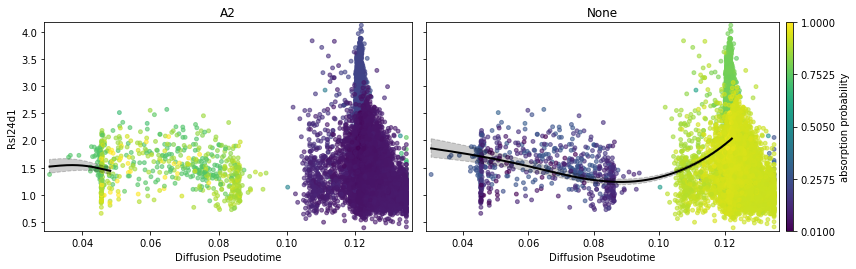

In [72]:
cr.pl.gene_trends(
    adata,
    model,
    ["Rsl24d1"],
    data_key="Ms",
    time_key="Diffusion Pseudotime",
    show_progress_bar=False,
)

In [ ]:
cr.pl.gene_trends(
    adata,
    model,
    ["Rsl24d1"],
    data_key="Ms",
    same_plot=True,
    hide_cells=True,
    time_key="Diffusion Pseudotime",
    show_progress_bar=False,
)

In [ ]:
b = adata.varm['terminal_lineage_drivers']
c = adata.varm['terminal_lineage_drivers']

In [ ]:
adata.varm['terminal_lineage_drivers']

In [74]:
genes = cr.pl.heatmap(
    adata,
    model,
    adata.var_names[:15],
    time_key="Diffusion Pseudotime",
    lineages="None",
    show_absorption_probabilities=True,
    show_progress_bar=False,
    return_genes=True,
)
genes

  0%|          | 0/15 [00:00<?, ?gene/s]

RuntimeError: Fatal model failure `<FailedModel[origin=GAM[gene='CAAA01118383.1', lineage='None', model=GammaGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, max_iter=2000, scale=None, terms=s(0), tol=0.0001, verbose=False)]]>`.

In [ ]:
cr.pl.heatmap(
    adata,
    model,
    adata.var_names[:3],
    mode="genes",
    time_key="dpt_pseudotime",
    scale=False,
    show_progress_bar=False,
)